In [2]:
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
path = 'datasets/data-resource_2016_10_24_bangladesh-population-growth-ratio.csv'

In [7]:
datasets=pd.read_csv(path)

In [8]:
datasets

,Year,Population,Male,Female
0,1971,65733076,34058589,31674487
1,1972,66997968,34713973,32283995
2,1973,68118479,35294549,32823930
3,1974,69248216,35879905,33368311
4,1975,70542557,36550548,33992009
5,1976,72088680,37351648,34737032
6,1977,73889336,38284630,35604706
7,1978,75898422,39325607,36572815
8,1979,78045163,40437908,37607255
9,1980,80253062,41581897,38671165


In [9]:
datasets=datasets[datasets['Year']>1999]

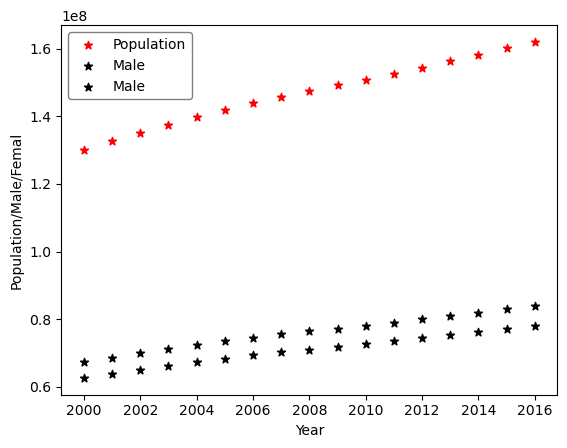

In [10]:
plt.scatter(datasets['Year'], datasets['Population'], label="Population", marker='*', color='red')

# Plot Male data on the same plot
plt.scatter(datasets['Year'], datasets['Male'], label="Male", marker='*', color='black')

# Plot female data on the same plot
plt.scatter(datasets['Year'], datasets['Female'], label="Male", marker='*', color='black')
# Set axis labels and legend
plt.xlabel("Year")
plt.ylabel("Population/Male/Femal")
plt.legend(loc="upper left", facecolor="w", edgecolor="k", framealpha=0.5, shadow=False, fancybox=True)

In [13]:
x=datasets[['Year']]
y=datasets['Population']
y_male=datasets['Male']
y_female=datasets['Female']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.30,random_state=1)
xtrain,xtest,male_train,male_test=train_test_split(x,y_male,train_size=0.30,random_state=1)
xtrain,xtest,female_train,female_test=train_test_split(x,y_female,train_size=0.30,random_state=1)

In [15]:
rg=LinearRegression()
male_rg=LinearRegression()
female_rg=LinearRegression()

In [16]:
rg.fit(xtrain,ytrain)
male_rg.fit(xtrain,male_train)
female_rg.fit(xtrain,female_train)

LinearRegression()

In [37]:
total_population = float(rg.predict([[2024]]))
total_population

C:\Users\Ovi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


175569651.5999999

In [38]:
total_female=float(female_rg.predict([[2024]]))
total_female

C:\Users\Ovi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84600919.79999995

In [39]:
total_male=float(male_rg.predict([[2024]]))
total_male

C:\Users\Ovi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90968731.79999995

In [25]:
from sklearn.metrics import r2_score
y_pred = rg.predict(xtest)
r2_toatal = r2_score(ytest, y_pred)

In [26]:
r2_toatal

0.9857493890655408

In [29]:
y_pred = male_rg.predict(xtest)
r2_male = r2_score(male_test, y_pred)

In [30]:
r2_male

0.9857493981356481

In [34]:
y_pred = female_rg.predict(xtest)
r2_female = r2_score(female_test, y_pred)

In [35]:
r2_female

0.9857493793127284

In [45]:
print("Total Population Prediction in 2024 = ",total_population)
print("Total Male Population Prediction in 2024 = ",total_male)
print("Total Female Population Prediction in 2024 = ",total_female)

Total Population Prediction in 2024 =  175569651.5999999
Total Male Population Prediction in 2024 =  90968731.79999995
Total Female Population Prediction in 2024 =  84600919.79999995
